# Handwritten Number Recognition (CNN)

In [92]:
import numpy as np
import random
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Importing Data

In [41]:
(x_train, y_train) ,(x_test, y_test) = mnist.load_data()

In [42]:
print(
np.shape(x_train),
np.shape(y_train),
np.shape(x_test),
np.shape(y_test), sep = '\n'
    )

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Preprocessing Data

In [43]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
y_train = y_train.reshape(len(y_train), 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
y_test = y_test.reshape(len(y_test), 1)

In [45]:
print(
np.shape(x_train),
np.shape(y_train),
np.shape(x_test),
np.shape(y_test), sep = '\n'
    )

(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)


### Normalization

In [46]:
x_train, x_test = x_train/255.0, x_test/255.0

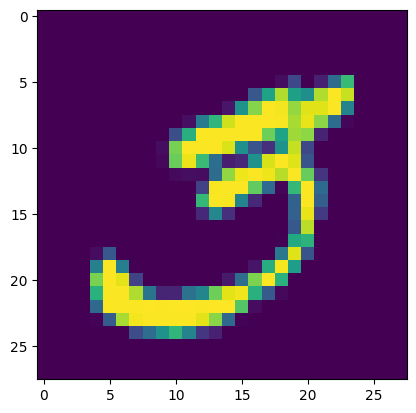

In [47]:
plt.imshow(x_train[1077])

## Building Model

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [50]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

## Training

In [51]:
model.fit(x = x_train, y = y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8993 - loss: 0.3363
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0538
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9887 - loss: 0.0355
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9918 - loss: 0.0260
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9939 - loss: 0.0201


## Testing

In [52]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9853 - loss: 0.0483


[0.038819819688797, 0.9876000285148621]

In [102]:
def predict(x):
    plt.imshow(x_train[x])
    arr = model.predict(x_train[x].reshape(1,28,28,1))
    indx = arr.max()
    result = (np.argmax(arr == indx))
    print("Predicted Val:",result)
    print("Actual Val:",y_train[x])

# Play around

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Val: 9
Actual Val: [9]


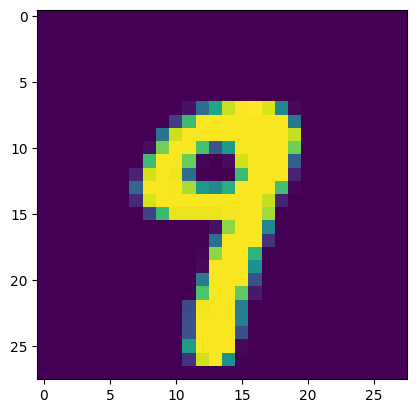

In [214]:
predict(random.randint(0,60000))